In [23]:
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0'

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = np.squeeze(y_train,axis=1)
y_test = np.squeeze(y_test,axis=1)

In [9]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000).batch(64)

In [11]:
train_ds

<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.float32)>

In [12]:
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.shuffle(10000).batch(64)

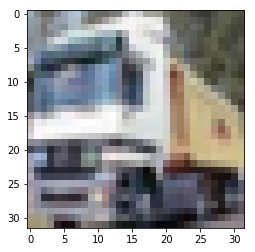

In [13]:
plt.imshow(x_train[1].astype('int16'))

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64,3, activation='relu',strides = 1,input_shape = (32,32,3)),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding ='same', data_format='channels_last'),
#     tf.keras.layers.Flatten(input_shape=(32,32.3)),##固定輸入
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')    
# ])

In [56]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3,activation='relu',padding ='same')
        self.maxpool = MaxPooling2D()
        self.conv2 = Conv2D(64, 3,activation='relu',padding ='same')
        self.flatten = Flatten()
        self.d1 = Dense(1024, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x): 
        #print("1: ",x.shape)
        x = self.conv1(x)
        #print("2: ",x.shape)
        x = self.maxpool(x)
        #print("3: ",x.shape)
        x = self.conv2(x)
        #print("4: ",x.shape)
        x = self.flatten(x)
        #print("5: ",x.shape)
        x = self.d1(x)
        #print("6: ",x.shape)
        return self.d2(x)

# Create an instance of the model
model = MyModel()

In [75]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [76]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        #print("P: ",predictions.shape)
        loss = loss_object(labels, predictions)
        #print(loss)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [77]:
#@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    test_loss(t_loss)
    test_accuracy(labels, predictions)


In [78]:
EPOCHS = 20

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    #template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print('Epoch {}/{}, Loss: {:.5f}, Accuracy: {:.5f}, Test Loss: {:.5f}, Test Accuracy: {:.5f}'.
            format(
                epoch+1,
                EPOCHS,
                train_loss.result(),
                train_accuracy.result()*100,
                test_loss.result(),
                test_accuracy.result()*100))

    # Reset the metrics for the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()


Epoch 1/20, Loss: 14.50591, Accuracy: 10.00000, Test Loss: 14.49956, Test Accuracy: 10.00000
Epoch 2/20, Loss: 14.50687, Accuracy: 10.00000, Test Loss: 14.50437, Test Accuracy: 10.00000
Epoch 3/20, Loss: 14.50687, Accuracy: 10.00000, Test Loss: 14.49955, Test Accuracy: 10.00000
Epoch 4/20, Loss: 14.50783, Accuracy: 10.00000, Test Loss: 14.50436, Test Accuracy: 10.00000
Epoch 5/20, Loss: 14.50784, Accuracy: 10.00000, Test Loss: 14.50437, Test Accuracy: 10.00000
Epoch 6/20, Loss: 14.50589, Accuracy: 10.00000, Test Loss: 14.50917, Test Accuracy: 10.00000
Epoch 7/20, Loss: 14.50494, Accuracy: 10.00000, Test Loss: 14.49956, Test Accuracy: 10.00000
Epoch 8/20, Loss: 14.50397, Accuracy: 10.00000, Test Loss: 14.50436, Test Accuracy: 10.00000
Epoch 9/20, Loss: 14.50590, Accuracy: 10.00000, Test Loss: 14.51399, Test Accuracy: 10.00000
Epoch 10/20, Loss: 14.50300, Accuracy: 10.00000, Test Loss: 14.50918, Test Accuracy: 10.00000
Epoch 11/20, Loss: 14.50687, Accuracy: 10.00000, Test Loss: 14.50918,

In [ ]:
tf.test.is_gpu_available()

In [ ]:
!source ~/.bashrc